<b>Copyright Notice</b><br>
Copyright © 2019 DigiPen (USA) Corp. and its owners.  All rights reserved.<br>
<b>Trademarks</b><br>
DigiPen® is a registered trademark of DigiPen (USA) Corp.<br>
All other product names mentioned in this booklet are trademarks or registered trademarks of their respective companies and are hereby acknowledged.

# MAT256 Project: Solving Initial Value ODE Problems

**Author:** Jonathan Ackerman<br>
**Date:** 7/8/19

In [174]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

from collections import namedtuple
from decimal import Decimal
decimal.getcontext()

Context(prec=7, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

<dl>
    <dt>@Note:</dt>
        <dd>I used the mathematical standard notation for variables when appropriate and abbreviations like <code><b>f</b></code> for the ODE to be solved in order to match variable name lengths. This notation favors quick comparison against mathematical definitions to spot algebraic errors rather than easy code comprehension from more descriptive variable names.</dd><br>
    <dt>@Notation:</dt>
    <dd>&nbsp;&nbsp;&nbsp;&nbsp;<code><b>z</b></code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;--&nbsp;&nbsp;In place of the standard scalar valued input <code><b>y</b></code>, I chose to use <code><b>z</b></code> to represent a vector valued input</dd>
    <dd>&nbsp;&nbsp;&nbsp;&nbsp;<code><b>z_n</b></code>&nbsp;&nbsp;--&nbsp;&nbsp;This represents the estimated value for <code><b>z</b></code> on the nth iteration</dd>
    <dd>&nbsp;&nbsp;&nbsp;&nbsp;<code><b>t_n</b></code>&nbsp;&nbsp;--&nbsp;&nbsp;This is simply the time of the nth iteration given each iteration is one step of <code><b>h</b></code></dd>
</dl>

In [217]:
#####################################
# Euler Method Definition
# params:
#   h  - step size
#   t  - time to approximate value at
#   f  - ODE
#   IV - initial values
#####################################
def Euler(h, t, f, IV):
    n = t / h
    t_n = IV.t
    z_n = IV.z
    
    output = np.array([])
    output.resize(int(n+1), z_n.size + 1)
    
    for i in range(int(n)):
        output[i,0] = Decimal(t_n).quantize(Decimal('.0000001'))
        for j in range(0, int(z_n.size)):
            output[i, j+1] = z_n.tolist()[j]
        # calc k1
        k1 = h * f(t_n, z_n)
        # calc z_n+1
        z_n = z_n + k1
        # calc t_n+1
        t_n = t_n + h
    output[-1,0] = t_n
    for i in range(0, int(z_n.size)):
        output[-1,i+1] = z_n.tolist()[i]
    return output
          

In [237]:
#####################################
# Midpoint Method Definition
# params:
#   h  - step size
#   t  - time to approximate value at
#   f  - ODE
#   IV - initial values
#####################################
def Midpoint(h, t, f, IV):
    n = t / h
    t_n = IV.t
    z_n = IV.z
    
    output = np.array([])
    output.resize(int(n+1), z_n.size + 1)
    
    for i in range(int(n)):
        output[i,0] = Decimal(t_n).quantize(Decimal('.0001'))
        for j in range(0, int(z_n.size)):
            output[i, j+1] = z_n.tolist()[j]
        # calc k1
        k1 = h * f(t_n, z_n)
        # calc k2
        k2 = h * f(t_n + (h / 2), z_n + (k1 / 2))
        # calc z_n+1
        z_n = z_n + k2
        # calc t_n+1
        t_n = t_n + h
    output[-1,0] = t_n
    for i in range(0, int(z_n.size)):
        output[-1,i+1] = z_n.tolist()[i]
    return output

In [120]:
#####################################
# Heun's Method (Modified Euler Method) Definition
# params:
#   h  - step size
#   t  - time to approximate value at
#   f  - ODE
#   IV - initial values
#####################################
def ModifiedEuler(h, t, f, IV):
    n = t / h
    t_n = IV.t
    z_n = IV.z
    
    output = np.array([])
    output.resize(int(n+1), z_n.size + 1)
    
    for i in range(int(n)):
        output[i,0] = t_n
        for j in range(0, int(z_n.size)):
            output[i, j+1] = z_n.tolist()[j]
        # calc k1
        k1 = h * f(t_n, z_n)
        # calc k2
        k2 = h * f(t_n + h, z_n + k1)
        # calc z_n+1
        z_n = z_n + (1 / 2) * (k1 + k2)
        # calc t_n+1
        t_n = round(t_n + h, 5)
    output[-1,0] = t_n
    for i in range(0, int(z_n.size)):
        output[-1,i+1] = z_n.tolist()[i]
    return output

In [121]:
#####################################
# Runge-Kutta Method Definition
# params:
#   h  - step size
#   t  - time to approximate value at
#   f  - ODE
#   IV - initial values
#####################################
def RK(h, t, f, IV):
    n = t / h
    t_n = IV.t
    z_n = IV.z
    
    output = np.array([])
    output.resize(int(n+1), z_n.size + 1)
    
    for i in range(int(n)):
        output[i,0] = t_n
        for j in range(0, int(z_n.size)):
            output[i, j+1] = z_n.tolist()[j]
        k1 = h * f( t_n, z_n )
        k2 = h * f( t_n + (h / 2), z_n + ((h * k1) / 2) )
        k3 = h * f( t_n + (h / 2), z_n + ((h * k2) / 2) )
        k4 = h * f( t_n + h, z_n + (h * k3) )
        # calc z_n+1
        z_n = z_n + (k1 / 6) + (k2 / 3) + (k3 / 3) + (k4 / 6)
        # calc t_n+1
        t_n = round(t_n + h, 5)
    output[-1,0] = t_n
    for i in range(0, int(z_n.size)):
        output[-1,i+1] = z_n.tolist()[i]
    return output
        

## A One-Dimensional ODE

---

\begin{align}
y' & = 1 - t + 4y \\
y(0) & = 1
\end{align}

---

In [233]:
def F1(t, z):
    z_p = 1 - t + 4 * z
    return z_p

initialValue = namedtuple('IV', ['t', 'z'])
t0 = 0
z0 = np.array([1])
IV = initialValue(t0, z0)
eq1 = F1

### 1. Euler Method

In [225]:
out = Euler(0.05, 1.0, eq1, IV)
print(out)

[[ 0.          1.        ]
 [ 0.05        1.25      ]
 [ 0.1         1.5475    ]
 [ 0.15        1.902     ]
 [ 0.2         2.3249    ]
 [ 0.25        2.82988   ]
 [ 0.3         3.433356  ]
 [ 0.35        4.1550272 ]
 [ 0.4         5.01853264]
 [ 0.45        6.05223917]
 [ 0.5         7.290187  ]
 [ 0.55        8.7732244 ]
 [ 0.6        10.55036928]
 [ 0.65       12.68044314]
 [ 0.7        15.23403177]
 [ 0.75       18.29583812]
 [ 0.8        21.96750574]
 [ 0.85       26.37100689]
 [ 0.9        31.65270827]
 [ 0.95       37.98824993]
 [ 1.         45.58839991]]


<IPython.core.display.Javascript object>


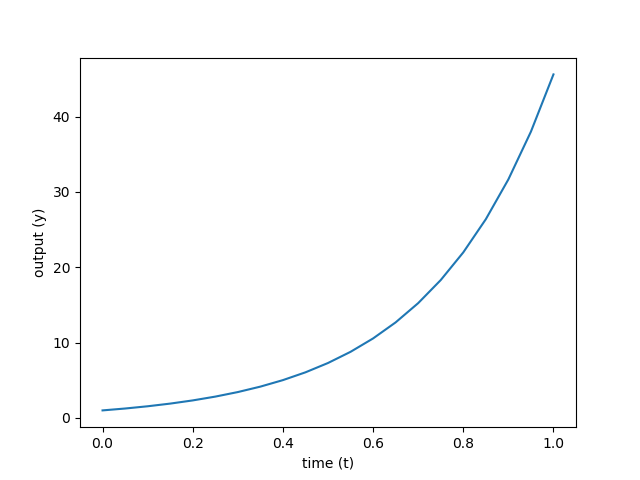

In [226]:
t = out[:,:1]
y = out[:,1:2]
plt.xlabel("time (t)")
plt.ylabel("output (y)")
plt.plot(t, y)
plt.show()

### 2. Midpoint Method

In [238]:
out = Midpoint(0.05, 1.0, eq1, IV)
print(out)

[[0.00000000e+00 1.00000000e+00]
 [5.00000000e-02 1.27375000e+00]
 [1.00000000e-01 1.60497500e+00]
 [1.50000000e-01 2.00631950e+00]
 [2.00000000e-01 2.49320979e+00]
 [2.50000000e-01 3.08446594e+00]
 [3.00000000e-01 3.80304845e+00]
 [3.50000000e-01 4.67696911e+00]
 [4.00000000e-01 5.74040232e+00]
 [4.50000000e-01 7.03504082e+00]
 [5.00000000e-01 8.61174981e+00]
 [5.50000000e-01 1.05325848e+01]
 [6.00000000e-01 1.28732534e+01]
 [6.50000000e-01 1.57261192e+01]
 [7.00000000e-01 1.92038654e+01]
 [7.50000000e-01 2.34439658e+01]
 [8.00000000e-01 2.86141382e+01]
 [8.50000000e-01 3.49189986e+01]
 [9.00000000e-01 4.26081783e+01]
 [9.50000000e-01 5.19862276e+01]
 [1.00000000e+00 6.34246976e+01]]


### 3. Modified Euler Method

In [9]:
ModifiedEuler(0.05, 1.0, eq1, IV)

array([63.42469764])

### 4. Runge-Kutta Method

In [10]:
RK(0.05, 1.0, eq1, IV)

array([46.13062499])

## A System of ODEs

---

\begin{align}
x' & = t - x + y \\
y' & = x + y \\
\\
x(0) & = 0 \\
y(0) & = 1
\end{align}

---

In [219]:
def F2(t, z):
    k = np.array([0, 0])
    k[0] = t - z[0] + z[1]
    k[1] = z[0] + z[1]
    return k

initialValue = namedtuple('IV', ['t', 'z'])
t0 = 0
z0 = np.array([0, 1])
IV = initialValue(t0, z0)
eq2 = F2

### 1. Euler Method

In [220]:
out = Euler(0.05, 1.0, eq2, IV)
print(out)

[[0.   0.   1.  ]
 [0.05 0.05 1.05]
 [0.1  0.1  1.1 ]
 [0.15 0.15 1.15]
 [0.2  0.2  1.2 ]
 [0.25 0.25 1.25]
 [0.3  0.3  1.3 ]
 [0.35 0.35 1.35]
 [0.4  0.4  1.4 ]
 [0.45 0.45 1.45]
 [0.5  0.5  1.5 ]
 [0.55 0.55 1.6 ]
 [0.6  0.6  1.7 ]
 [0.65 0.65 1.8 ]
 [0.7  0.7  1.9 ]
 [0.75 0.75 2.  ]
 [0.8  0.85 2.1 ]
 [0.85 0.95 2.2 ]
 [0.9  1.05 2.35]
 [0.95 1.15 2.5 ]
 [1.   1.25 2.65]]


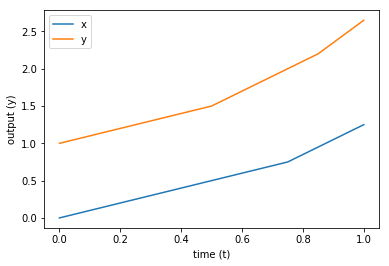

In [114]:
t = out[:,:1]
y = out[:,1:]

plt.xlabel("time (t)")
plt.ylabel("output (y)")
line1, line2 = plt.plot(t, y)
plt.legend((line1, line2), ("x", "y"))
plt.show()

### 2. Midpoint Method

### 3. Modified Euler Method

In [13]:
ModifiedEuler(0.05, 1.0, eq2, IV)

array([1.275, 2.775])

### 4. Runge-Kutta Method

In [14]:
RK(0.05, 1.0, eq2, IV)

array([1.24166667, 2.64166667])

## A Second Order ODE

---

\begin{align}
2y'' + 5y' - 3y & = 0 \\
\\
y(0) & = 5 \\
y'(0) & = 13
\end{align}

---

In [221]:
def F3(t, z):
    k = np.array([0, 0])
    k[0] = z[1]
    k[1] = 0.5 * (3 * z[0] - 5 * z[1])
    return k

initialValue = namedtuple('IV', ['t', 'z'])
t0 = 0
z0 = np.array([5, 13])
IV = initialValue(t0, z0)
eq3 = F3

### 1. Euler Method

In [222]:
out = Euler(0.05, 1.0, eq3, IV)
print(out)

[[ 0.    5.   13.  ]
 [ 0.05  5.65 11.75]
 [ 0.1   6.2  10.75]
 [ 0.15  6.7   9.9 ]
 [ 0.2   7.15  9.2 ]
 [ 0.25  7.6   8.6 ]
 [ 0.3   8.    8.1 ]
 [ 0.35  8.4   7.7 ]
 [ 0.4   8.75  7.4 ]
 [ 0.45  9.1   7.15]
 [ 0.5   9.45  6.95]
 [ 0.55  9.75  6.8 ]
 [ 0.6  10.05  6.7 ]
 [ 0.65 10.35  6.65]
 [ 0.7  10.65  6.6 ]
 [ 0.75 10.95  6.6 ]
 [ 0.8  11.25  6.6 ]
 [ 0.85 11.55  6.6 ]
 [ 0.9  11.85  6.6 ]
 [ 0.95 12.15  6.65]
 [ 1.   12.45  6.7 ]]


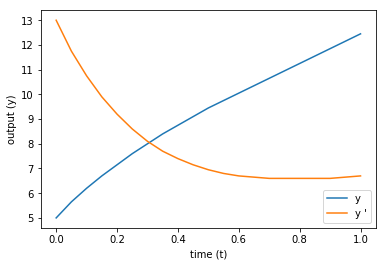

In [117]:
t = out[:,:1]
y = out[:,1:]

plt.xlabel("time (t)")
plt.ylabel("output (y)")
line1, line2 = plt.plot(t, y)
plt.legend((line1, line2), ("y", "y '"))
plt.show()

### 2. Midpoint Method

### 3. Modified Euler Method

In [17]:
ModifiedEuler(0.05, 1.0, eq3, IV)

array([12.45 ,  6.875])

### 4. Runge-Kutta Method

In [18]:
RK(0.05, 1.0, eq3, IV)

array([12.40833333,  6.73333333])